<div align="center">
<a href="https://vbti.nl"><img src="https://drive.google.com/uc?id=1DdCGllL51O5wBuiI0rwygofKx3YIDPHX" width="400"></a>
</div>

# Exercise - Artificial Neural Networks
In this notebook you will build and train an ANN to recognize handwitten numbers using Keras. At locations where you read `DIY` (Do It Yourself) you need to program yourself!

In [5]:
# import some default libaries
import numpy as np
import matplotlib.pyplot as plt

# Data preparation
In this exercise, you would need to build a neural network for handwritten digit recognition. The well known MNIST dataset consists of 70,000 images of handwritten numbers. The challenge is to train a neural network that labels each image with the correct number. To train the neural network 60,000 images are used. The remaining 10,000 images are used to validate the performance of the neural network.

The dataset is available through Keras Datasets. We download and prepare the data. First, inputs need to be flattened and scaled, since neural networks work better with scaled data between 0 and 1. Second, the labels need to be one-hot encoded.

### Load Data

In [6]:
from tensorflow.keras.datasets import mnist

# load data
(x_train, y_train), (x_val, y_val) = mnist.load_data()

# inspect shape and type
x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_val.dtype, y_train.dtype

((60000, 28, 28),
 (60000,),
 (10000, 28, 28),
 (10000,),
 dtype('uint8'),
 dtype('uint8'))

In [ ]:
# DIY TASK 1: scale data between 0 and 1

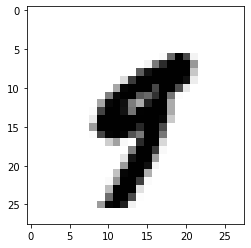

In [7]:
# plot a sample point
plt.imshow(x_train[36000], cmap='binary')

In [ ]:
# plot first few numbers
nrows, ncols = 8, 12
fig, axs = plt.subplots(nrows, ncols, figsize=(ncols, nrows))
axs = axs.ravel() 
for i in range(nrows*ncols):
    axs[i].imshow(x_train[i], cmap='binary')
    axs[i].set(xticks=[], yticks=[])

### Reshape a square image to a vector

In [ ]:
# DIY TASK 2: reformat data from 2D image to 1D vector in the form (batch_size, input_vector_size)
# Hint: use numpy's reshape function

### One-Encode Labels
<div align="center">
<a><img src="https://drive.google.com/uc?id=1TZWumlT60fwqoQYLJ-OD6e4-k_pymBep" width="400"></a>
</div>

In [ ]:
# DIY TASK 3: reformat target vector from categorical label to one-hot-encoding
# hint: use keras.utils function to_categorical
from tensorflow.keras import utils

# Build neural network
A neural network can be build in two step. First the topology of the neural network is defined. This contains o.a. the number of layers, number of nodes (neurons) per layer and type of activation function. Next, a loss function and optimization function need to be defined. Use [Keras](https://keras.io) for programming the neural network.

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers

# DIY TASK 4: define model topology
# hint: use a Sequential keras model

# DIY TASK 5: define model optimization method
# hint: use a categorical_crossentropy loss function
# hint: use categorical_accuracy metrics

# Train neural network

In [ ]:
# DIY TASK 6: train the model
history = model.fit(...
# Hint: do not forget to pass validation data
# Hint: use "model.fit?" to see the arguments of the function

In [ ]:
# plot training loss history
history_dict = history.history
loss_values  = history_dict['loss']
val_loss_values  = history_dict['val_loss']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# plot training accuracy history
history_dict = history.history
loss_values  = history_dict['categorical_accuracy']
val_loss_values  = history_dict['val_categorical_accuracy']

epochs = range(1, len(loss_values)+1)

plt.plot(epochs, loss_values, 'bo', label='Training accuracy')
plt.plot(epochs, val_loss_values, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
# Evaluate performance of model by plotting confusion matrix
from sklearn.metrics import confusion_matrix

# see http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools

def accuracy(y, y_pred):
    return np.sum(y==y_pred)/len(y)

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.grid(False)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')    
    

    

# predict labels from validation set
y_pred = model.predict(x_val)

# convert data to label number
y_pred = np.argmax(y_pred, axis=1) 
y_true = np.argmax(y_val, axis=1) 

# compute the confusion matrix
cm = confusion_matrix(y_true, y_pred) 

# plot the confusion matrix
plot_confusion_matrix(cm, 
                      title='Confusion matrix (acc={})'.format(accuracy(y_true, y_pred)), 
                      classes = range(10))

## Questions (optional):
- Which digits were miscategorised the most?
- Which digit was the most mislabeled as some other digit? Why? *Hint: you can make the model to predict bunch of samples and then select those that were wrongly classified.*
- Is there a way to improve classification accuracy? More neurons? More layers? Different activation functions?